Literatura:

1. "Zasady inżynierii reaktorów chemicznych" B.Tabiś 
2. http://www.umich.edu/~elements/5e/


** Reaktor izotermiczne półokresowy **

Text(0,0.5,'Stezenie reagentow')

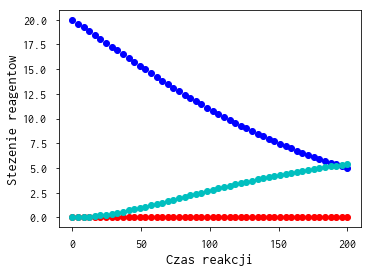

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy
from scipy.integrate import odeint

# reaktor półokresowy !

# A --> C, katalizatorem jest dostaczany B, 
# wyrażenie na szybkość wyznaczone doświadczalnie: v=-k*ca*cb, 
# k=0.25 mol/L*min
# V0 = 2700 L
# A0 = 20 mol/L
# B0 = 0
# [B] = 0.05 mol/L
# FlowB = 12.5 L/min
# t = 0 ... 200 min

B = 0.05 #mol/L
FlowB = 12.5 #L/min
k = 0.25 #mol/L*min
FB = FlowB * B #mol/min

def model(y, t):  

    nA = y[0]              # ponieważ V(t), trzeba stosować n(t) zamiast jak zwykle c(t) 
    nB = y[1]
    nC = y[2]
    V = y[3]               # czwarta zmienna zależna od czasu

    cA = nA/V
    cB = nB/V
    
    dnAdt = -k*cA*cB*V     # substrat
    dnBdt = FB             # katalizator
    dnCdt = k*cA*cB*V      # produkt
    dVdt = FlowB           # objętość układu (zmienna w czasie!)

    return [dnAdt, dnBdt, dnCdt, dVdt]

A0 = 20 #mol/L
B0 = 0
C0 = 0
V0 = 2700 #L

nA0 = A0 * V0
nB0 = B0 * V0
nC0 = C0 * V0

initial = [nA0, nB0, nC0, V0]
t = numpy.linspace(0, 200,50)
results = odeint( model, initial, t )

# stężenie c = n/V
cA = results[:,0]/results[:,3]
cB = results[:,1]/results[:,3]
cC = results[:,2]/results[:,3]
V = results[:,3]

#n
nA = results[:,0]
nB = results[:,1]
nC = results[:,2]


plt.plot(t,cA,'bo', label='[a]')
plt.plot(t,cB,'ro', label='[b]')
plt.plot(t,cC,'co', label='[b]')
#plt.plot(t,V,'co', label='V')
plt.xlabel('Czas reakcji')
plt.ylabel('Stezenie reagentow')


[2700.         2751.02040816 2802.04081633 2853.06122449 2904.08163265
 2955.10204082 3006.12244898 3057.14285714 3108.16326531 3159.18367347
 3210.20408163 3261.2244898  3312.24489796 3363.26530612 3414.28571429
 3465.30612245 3516.32653061 3567.34693878 3618.36734694 3669.3877551
 3720.40816327 3771.42857143 3822.44897959 3873.46938776 3924.48979592
 3975.51020408 4026.53061224 4077.55102041 4128.57142857 4179.59183673
 4230.6122449  4281.63265306 4332.65306122 4383.67346939 4434.69387755
 4485.71428571 4536.73469388 4587.75510204 4638.7755102  4689.79591837
 4740.81632653 4791.83673469 4842.85714286 4893.87755102 4944.89795918
 4995.91836735 5046.93877551 5097.95918367 5148.97959184 5200.        ]


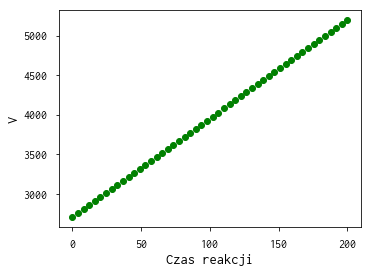

In [2]:
plt.plot(t,V,'go', label='V')
plt.xlabel('Czas reakcji')
plt.ylabel('V')

print(V)

Text(0,0.5,'Szybkosc reakcji, mol/L*min')

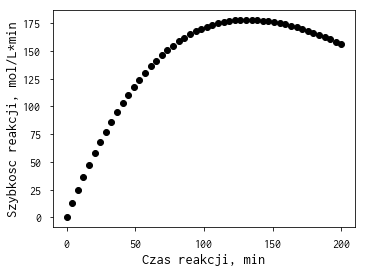

In [3]:
# szybkość reakcji w funkcji czasu

plt.plot(t,k*cA*cB*V,'ko', label='V')
plt.xlabel('Czas reakcji, min')
plt.ylabel('Szybkosc reakcji, mol/L*min')

In [4]:
nA + nC

array([54000., 54000., 54000., 54000., 54000., 54000., 54000., 54000.,
       54000., 54000., 54000., 54000., 54000., 54000., 54000., 54000.,
       54000., 54000., 54000., 54000., 54000., 54000., 54000., 54000.,
       54000., 54000., 54000., 54000., 54000., 54000., 54000., 54000.,
       54000., 54000., 54000., 54000., 54000., 54000., 54000., 54000.,
       54000., 54000., 54000., 54000., 54000., 54000., 54000., 54000.,
       54000., 54000.])

** Zadanie 1 ** 

Przekształcić powyższy model reaktora półokresowego w okresowy. Porównać wydajność procesu.